In [ ]:
#9th August , 2022
#WEB SCRAPING - (EXTRACTING SOMETHING FROM THE WEB)
#BEAUTIFUL SOUP - WEB SCRAPING LIBRARY - We will try to extract reviews from users

In [ ]:
#requests library reads the url and loads thewebpage
import requests
from bs4 import BeautifulSoup as bs


In [ ]:
url="https://www.amazon.in/Apple-iPhone-Pro-Max-256GB/product-reviews/B09G93NZVW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
page=requests.get(url)#extraxts the url and loads the data of the page
page #response[200] is okay and response [503] is an error - try rerunning your cell atleast 10 times until you get response 200
#or please check for correct url

<Response [200]>

In [ ]:
#this code will display the page sorce code
page.content
#But the source is not in readable format

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21P6CS3L9LL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,01smHc51S9L.css,21aPhFy+riL.c

In [ ]:
soup=bs(page.content,"html.parser")
#html.parser converts my html code into better readable format

In [ ]:
soup

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:aui-assets -->
<link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21P6CS3L9LL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,01smHc51S9L.css,21aPhFy+riL.css,11gneA3MtJL.css,21fec

In [ ]:
#Never ever consider TOP POSITIVE and TOP CRITICAL review
names=soup.find_all("span",class_="a-profile-name")[2:]
names

[<span class="a-profile-name">raghav</span>,
 <span class="a-profile-name">Prachi D.</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Kajal</span>,
 <span class="a-profile-name">Dev Mittal</span>,
 <span class="a-profile-name">Apratim roy barman</span>,
 <span class="a-profile-name">Subbii</span>,
 <span class="a-profile-name">kamlesh</span>,
 <span class="a-profile-name">Aniket Magar</span>,
 <span class="a-profile-name">Jayta Sen Shukla</span>]

In [ ]:
type(names)

list

In [ ]:
len(names)

10

In [ ]:
#Now let us create dataframe using the data from the names list
import pandas as pd
df = pd.DataFrame(names,columns = {'Customer Name'})
df
#In a few cases m if you have got more tahn 10 elements,then you have to drop down the duplicates 

,Customer Name
0,raghav
1,Prachi D.
2,Amazon Customer
3,Kajal
4,Dev Mittal
5,Apratim roy barman
6,Subbii
7,kamlesh
8,Aniket Magar
9,Jayta Sen Shukla


In [ ]:
#Now the next thing is review title
r_title=soup.find_all("a",class_="review-title")
r_title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2LC766FZ724CK?ASIN=B09G93NZVW">
 <span>iPhone is  depreciating asset 😡😡</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R10VD1UA2QBC62?ASIN=B09G93NZVW">
 <span>Think carefully before buying</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RFU3HNFRTAN09?ASIN=B09G93NZVW">
 <span>Glittering gold</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2PMEODOJV4BDP?ASIN=B09G93NZVW">
 <span>Amazing 🤩</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" dat

In [ ]:
len(r_title)

10

In [ ]:
#Data Cleaning
review_title = [] #empty list
#for i in range(0,10):
for i in range(0,len(r_title)):
  review_title.append(r_title[i].get_text()[1:-1])
review_title

['iPhone is  depreciating asset 😡😡',
 'Think carefully before buying',
 'Glittering gold',
 'Amazing 🤩',
 'I phone 13 pro max',
 '🍎 NEVER DISAPPOINTS..!!',
 'Its Apple 🍎 and they made it perfect as always',
 'Jabardast',
 'What was apple thinking?',
 'Not worthy for its price']

In [ ]:
#Next is review date
r_date=soup.find_all("span",class_="review-date")[2:]
r_date

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 30 September 2021</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 26 January 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 17 December 2021</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 27 December 2021</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 18 March 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 30 November 2021</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 16 April 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 16 December 202

In [ ]:
len(r_date)

10

In [ ]:
#Data cleaning
review_date=[]
for i in range(0,len(r_date)):
  #review_date.append(r_date[i].get_text().replace('Reviewed in India on ',''))
  review_date.append(r_date[i].get_text()[21:])
review_date

['30 September 2021',
 '26 January 2022',
 '17 December 2021',
 '27 December 2021',
 '18 March 2022',
 '30 November 2021',
 '16 April 2022',
 '16 December 2021',
 '14 January 2022',
 '20 January 2022']

In [ ]:
#Next is review rating
r_rating = soup.select('i.review-rating')[2:]
r_rating

[<i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-2 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">2.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-

In [ ]:
len(r_rating)

10

In [ ]:
#data cleaning
review_rating=[]
for i in range(0,len(r_rating)):
  review_rating.append(r_rating[i].get_text())
review_rating

['1.0 out of 5 stars',
 '2.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '2.0 out of 5 stars']

In [ ]:
#Next is review title content
content = soup.select('span.review-text')
content

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>According to me guys<br/>First of all I haven't purchased iPhone<br/>Secondly according to me if you have this much budget of more than 1lakhs spending on mobile is not worth at all<br/>Infact you can invest that money on apple stock or other  stock  so that the money could get doubled in future bcoz buying  iPhone is a depreciating asset<br/>Hope you understand 🙂</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>The product is good but think carefully before buying from here. Apple has new warranty policies. In case of defective product you will not get a replacement no matter whatever is mentioned here. I received a defective device and did not get a replacement from amazon.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body"><div class="a-section a-spacing-small a-spacing-top-mini video-bl

In [ ]:
len(content)

10

In [ ]:
#Data Filtering
review_content = [] #empty list
for i in range(0,len(content)):
  review_content.append(content[i].get_text().replace('\n',''))
review_content

["According to me guysFirst of all I haven't purchased iPhoneSecondly according to me if you have this much budget of more than 1lakhs spending on mobile is not worth at allInfact you can invest that money on apple stock or other  stock  so that the money could get doubled in future bcoz buying  iPhone is a depreciating assetHope you understand 🙂",
 'The product is good but think carefully before buying from here. Apple has new warranty policies. In case of defective product you will not get a replacement no matter whatever is mentioned here. I received a defective device and did not get a replacement from amazon.',
 '                    The media could not be loaded.                \xa0Heavy phone.. Clean and sharp finish .. Gorgeous phone',
 'It’s amazing ❣️😍😍',
 '                    The media could not be loaded.                \xa0Khud ki earning ka I phone best feeling ever ❤️Everything is best..❤️',
 '                    The media could not be loaded.                \xa0From iPho

In [ ]:
review_content[3]

'It’s amazing ❣️😍😍'

In [ ]:
df['Review title'] = review_title
df['Review date'] = review_date
df['Review Content'] = review_content
df['Review Rating'] = review_rating
df

,Customer Name,Review title,Review date,Review Content,Review Rating
0,raghav,iPhone is depreciating asset 😡😡,30 September 2021,According to me guysFirst of all I haven't pur...,1.0 out of 5 stars
1,Prachi D.,Think carefully before buying,26 January 2022,The product is good but think carefully before...,2.0 out of 5 stars
2,Amazon Customer,Glittering gold,17 December 2021,The media could not be loa...,5.0 out of 5 stars
3,Kajal,Amazing 🤩,27 December 2021,It’s amazing ❣️😍😍,5.0 out of 5 stars
4,Dev Mittal,I phone 13 pro max,18 March 2022,The media could not be loa...,5.0 out of 5 stars
5,Apratim roy barman,🍎 NEVER DISAPPOINTS..!!,30 November 2021,The media could not be loa...,5.0 out of 5 stars
6,Subbii,Its Apple 🍎 and they made it perfect as always,16 April 2022,The media could not be loa...,5.0 out of 5 stars
7,kamlesh,Jabardast,16 December 2021,The media could not be loa...,5.0 out of 5 stars
8,Aniket Magar,What was apple thinking?,14 January 2022,This phone is so heavy and slippery and hard t...,3.0 out of 5 stars
9,Jayta Sen Shukla,Not worthy for its price,20 January 2022,Too expensive for its features. Product isn’t ...,2.0 out of 5 stars


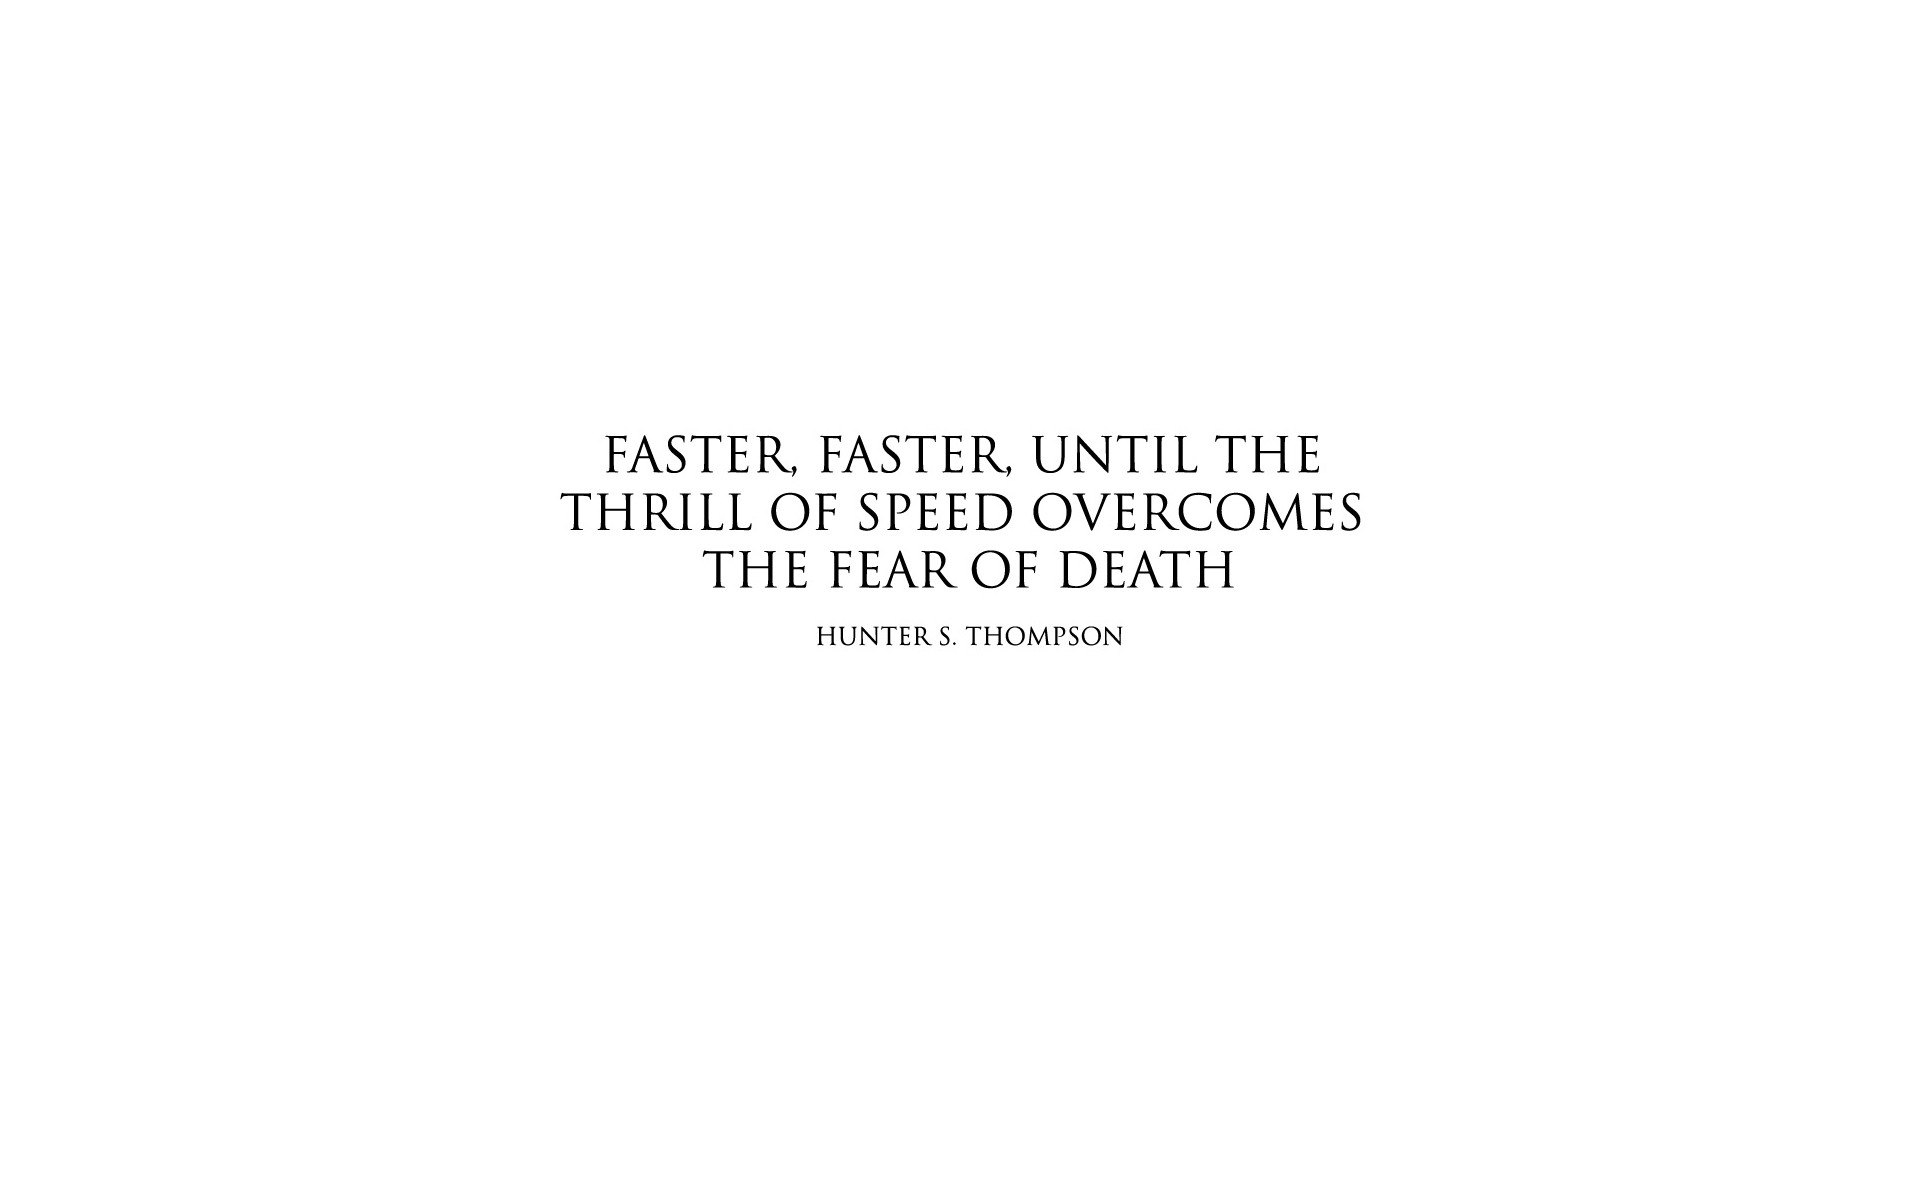

In [ ]:
#IMAGE PROCESSING using PyTesseract(OCR) - only works for white background
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/630bf703fafe1e940e8df7a426ed0346.jpg")
cv2_imshow(img)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract --quiet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,673 kB/s)
debconf: unable to initi

In [ ]:
#OCR PART
import pytesseract as pt
op = pt.image_to_string(img)
print(op)

FASTER, FASTER, UNTIL THE
THRILL OF SPEED OVERCOMES
THE FEAR OF DEATH

HUNTER S. THOMPSON

